<a href="https://colab.research.google.com/github/praveendhac/aiml-iisc-assignments/blob/main/assignment1/water_quality_pd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

THEME


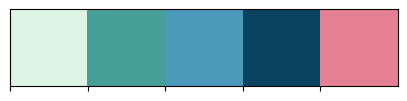

In [1]:
# linear algebra
import numpy as np
import pandas as pd

# viz = visualizations
import seaborn as sbn
import matplotlib as mlb
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

# theme
theme = ["#DEF5E5","#459E97","#4B9ABB","#0A4361","#E68193"]
print("THEME")
sbn.palplot(sbn.color_palette(theme))


# Importing DataSet from Collab

In [3]:
water_df = pd.read_csv('water_potability.csv')

In [4]:
print ('****'*10)
print(f'Dataframe has {water_df.shape[0]} Rows, {water_df.shape[1]} Columns')
print ('****'*10)

water_df.head().style.set_properties(**{'background-colour': '#A2DBFA',
                                        'color': 'black',
                                        'border': '1.5px solid black'}).bar(color='#F3F1F5',
                                                                            vmin=100_000,
                                                                            subset=['Potability'])

****************************************
Dataframe has 3276 Rows, 10 Columns
****************************************


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,nan,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,nan,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,nan,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [6]:
# understand data e.g. pH has 2785 non-null values out of 3276 total entries
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
water_df.fillna(water_df.mean(), inplace=True)
water_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [10]:
# check count column
water_df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [11]:
# formatting the table, check count column
water_df.describe().T.style.bar(subset=['mean'], color='#E68193')\
.background_gradient(subset=['std'], cmap='mako_r')\
.background_gradient(subset=['50%'], cmap='mako')


,count,mean,std,min,25%,50%,75%,max
ph,3276.000000,7.080795,1.469956,0.000000,6.277673,7.080795,7.870050,14.000000
Hardness,3276.000000,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.000000,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.000000,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,3276.000000,333.775777,36.142612,129.000000,317.094638,333.775777,350.385756,481.030642
Conductivity,3276.000000,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.000000,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3276.000000,66.396293,15.769881,0.738000,56.647656,66.396293,76.666609,124.000000
Turbidity,3276.000000,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.000000,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


<Axes: >

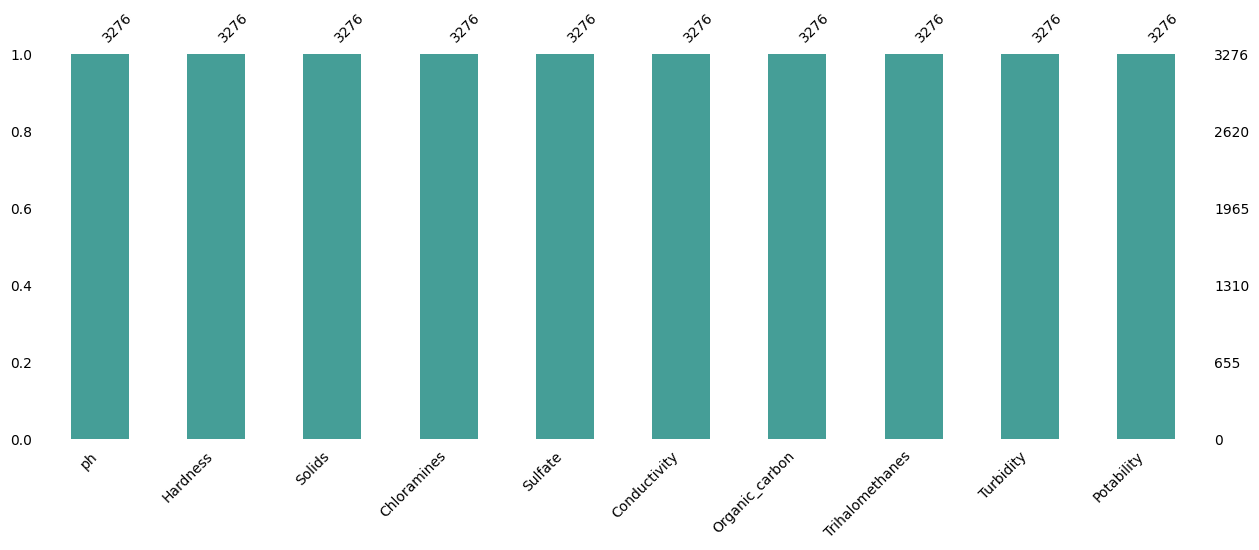

In [13]:
# check all bars are filled or not
msno.bar(water_df, figsize=(15,5), fontsize=10, color='#459E97')

# Exploratory Data Analysis

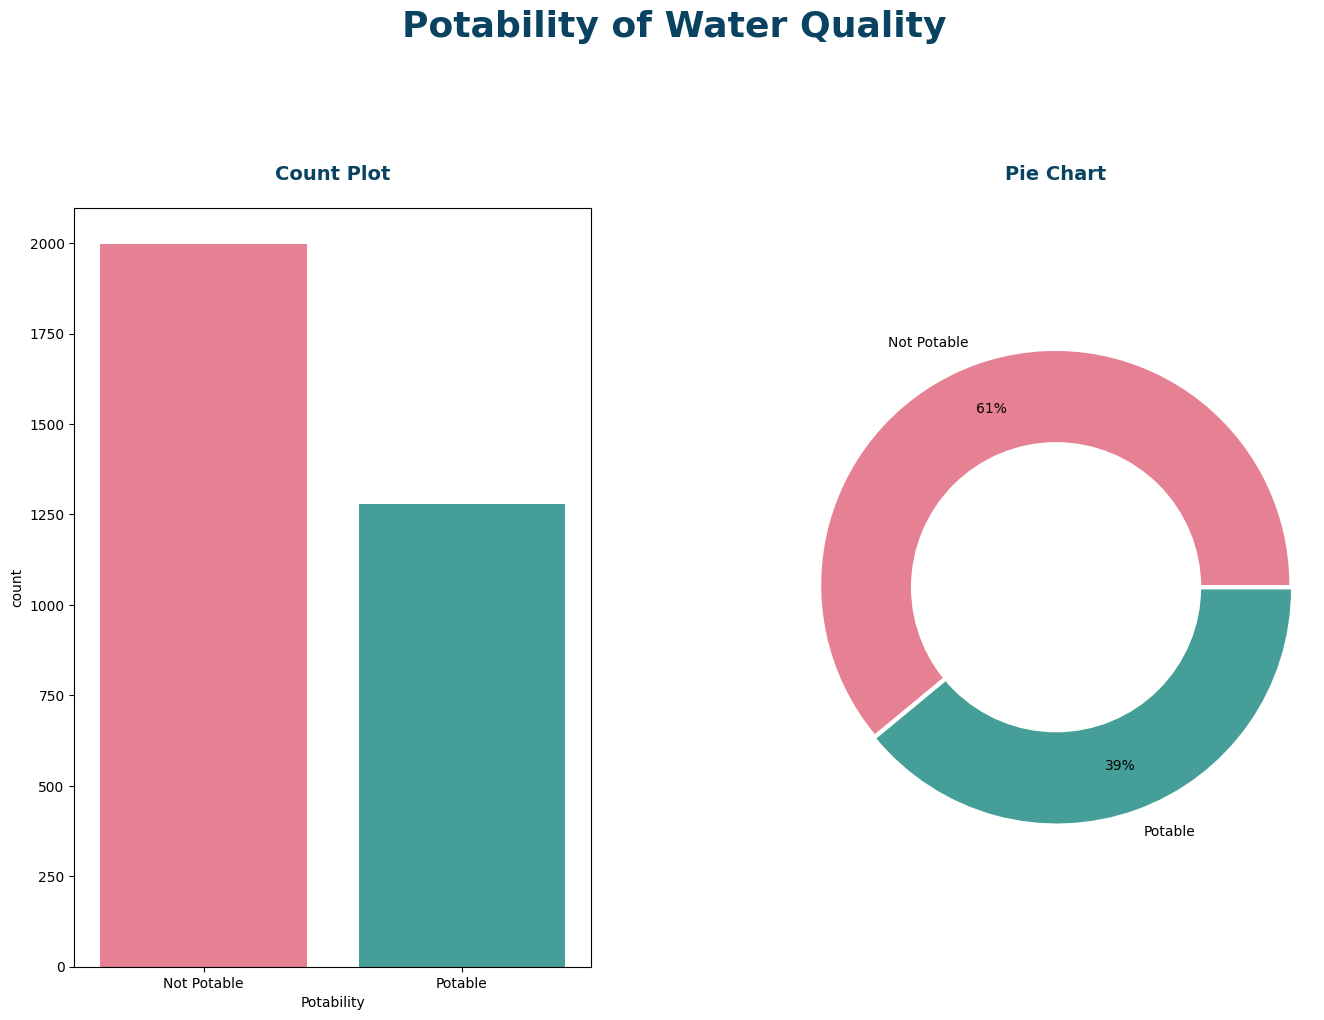

In [19]:
# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 11))
fig.suptitle('Potability of Water Quality', size=26, color=theme[3], weight='bold')
axs = [ax1, ax2]

# Count-Plot
sbn.countplot(x='Potability', data=water_df, ax=ax1, palette='husl')
ax1.set_title('Count Plot', size=14, color=theme[3], weight='bold', pad=20)
ax1.set_xticklabels(['Not Potable', 'Potable'])

# Data 2
names=['Not Potable', 'Potable']
values = water_df['Potability'].value_counts()
colors = ['#E68193', '#459E97']
explode = (0.01, 0.01)

# Doughnut-Chart
ax2.pie(x=values, labels=names, colors=colors, autopct='%1.0f%%', pctdistance=0.8, explode=explode)

# Draw Circle
centre_circle = plt.Circle((0,0), 0.62, fc='white')
ax2.add_artist(centre_circle)
ax2.axis('equal')

ax2.set_title('Pie Chart', size=14, color=theme[3], weight='bold', pad=20)

plt.subplots_adjust(left=None, bottom=None, right=None, top=0.8, wspace=0.4, hspace=None)

Text(0.5, 1.08, 'Distribution of Features')

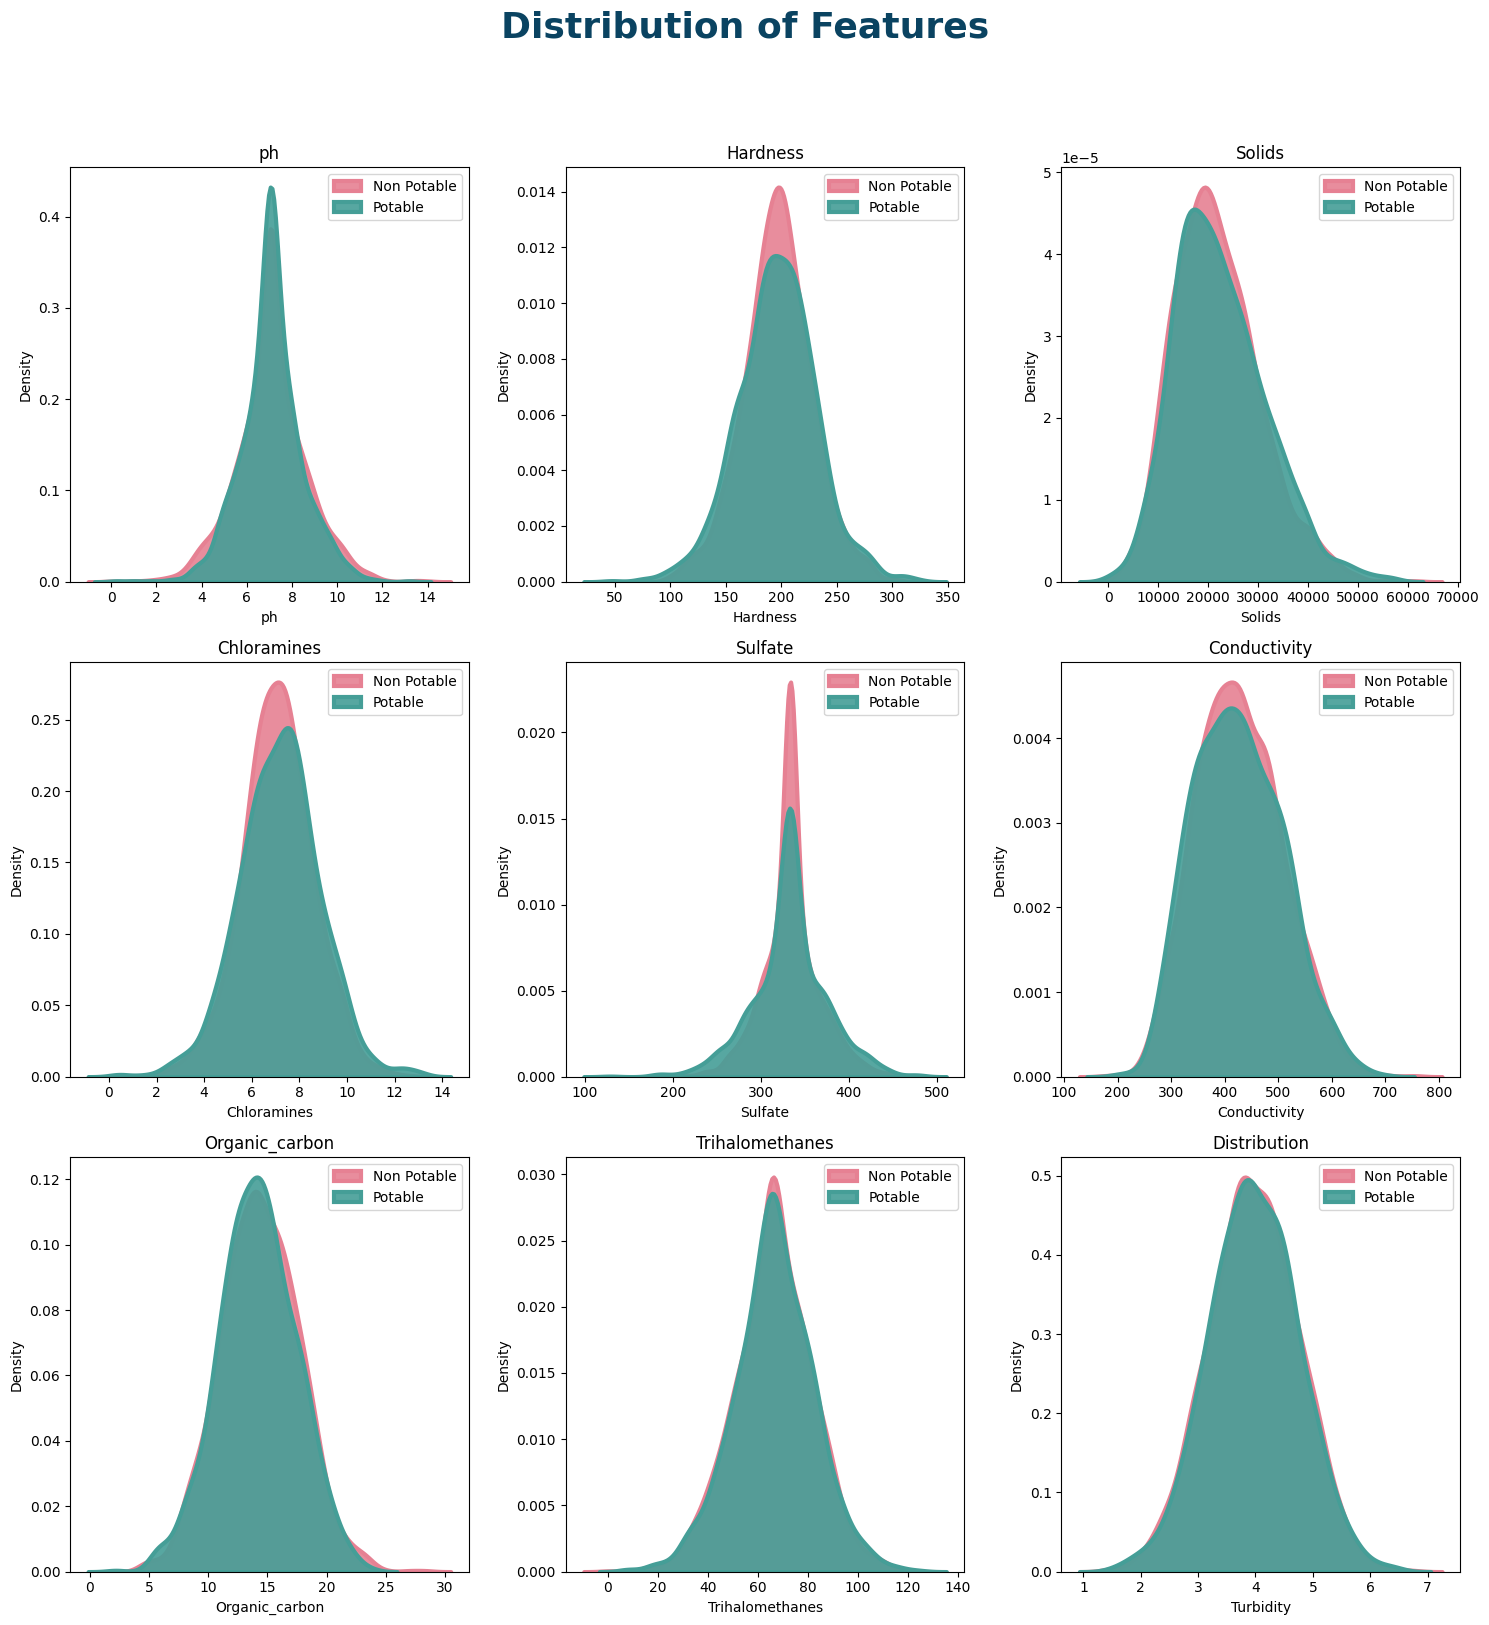

In [23]:
non_potable= water_df.query('Potability==0')
potable= water_df.query('Potability==1')

plt.figure(figsize=(15, 15))
for ax, col in enumerate(water_df.columns[:9]):
  plt.subplot(3, 3, ax+1)
  plt.title(col)
  plotting = sbn.kdeplot(x=non_potable[col], label="Non Potable", fill=True, common_norm=False, color='#E68193', alpha=0.9, linewidth=3)
  plotting = sbn.kdeplot(x=potable[col], label="Potable", fill=True, common_norm=False, color='#459E97', alpha=0.9, linewidth=3)
  plt.legend()
plt.tight_layout()
plt.title('Distribution')
plotting.figure.suptitle('Distribution of Features', y=1.08, size=26, color=theme[3], weight='bold')

Text(0.5, 1.08, 'Water Quality')

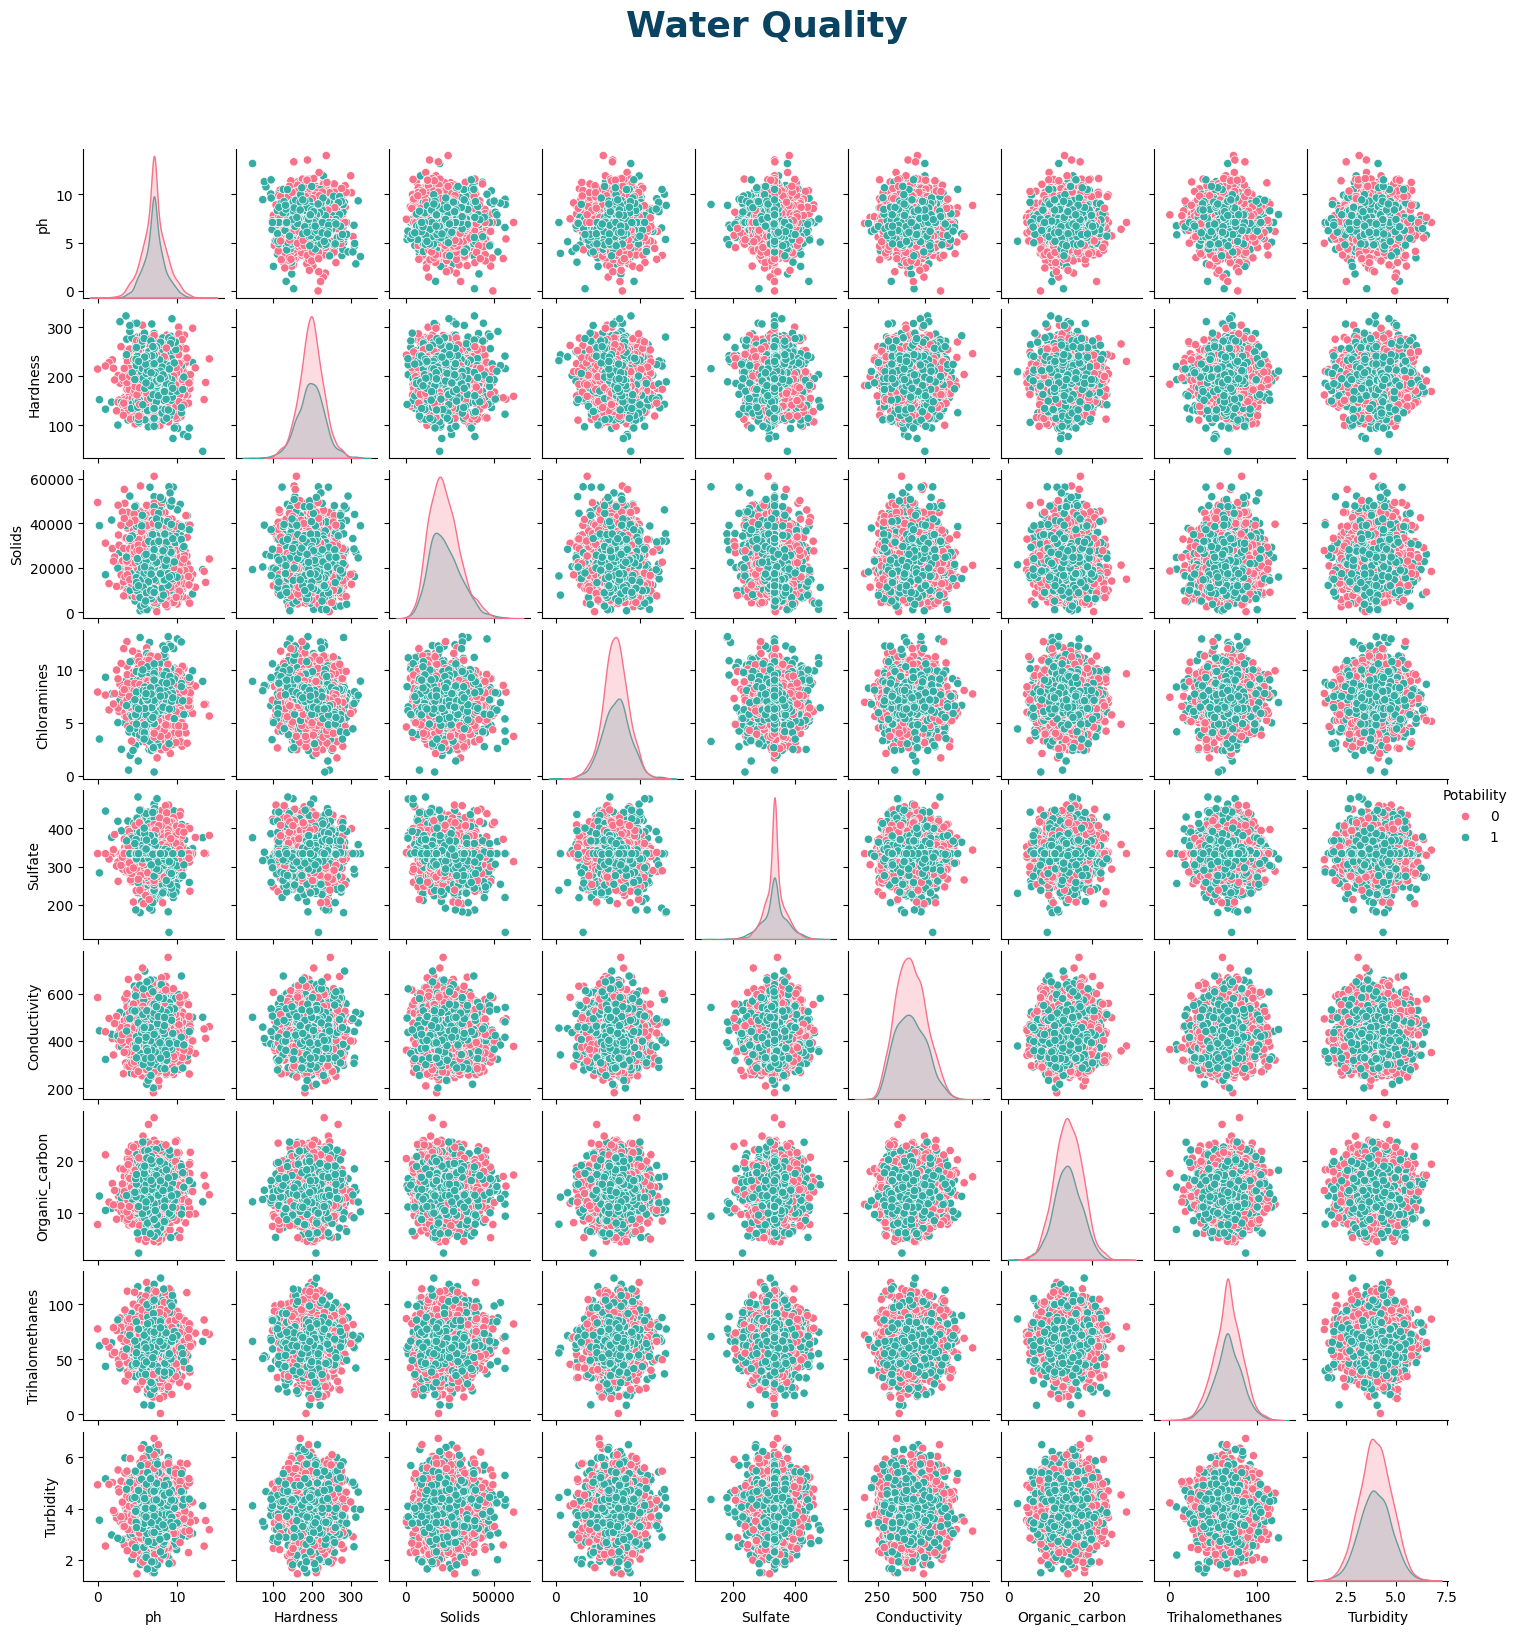

In [24]:
# Scatter Plot
ax = sbn.pairplot(water_df, hue='Potability', diag_kind='kde', kind='scatter', palette='husl')
ax.fig.set_size_inches(15, 15)
ax.fig.suptitle('Water Quality', y=1.08, size=26, color=theme[3], weight='bold')

Text(0.5, 1.0, 'Correlation of Features')

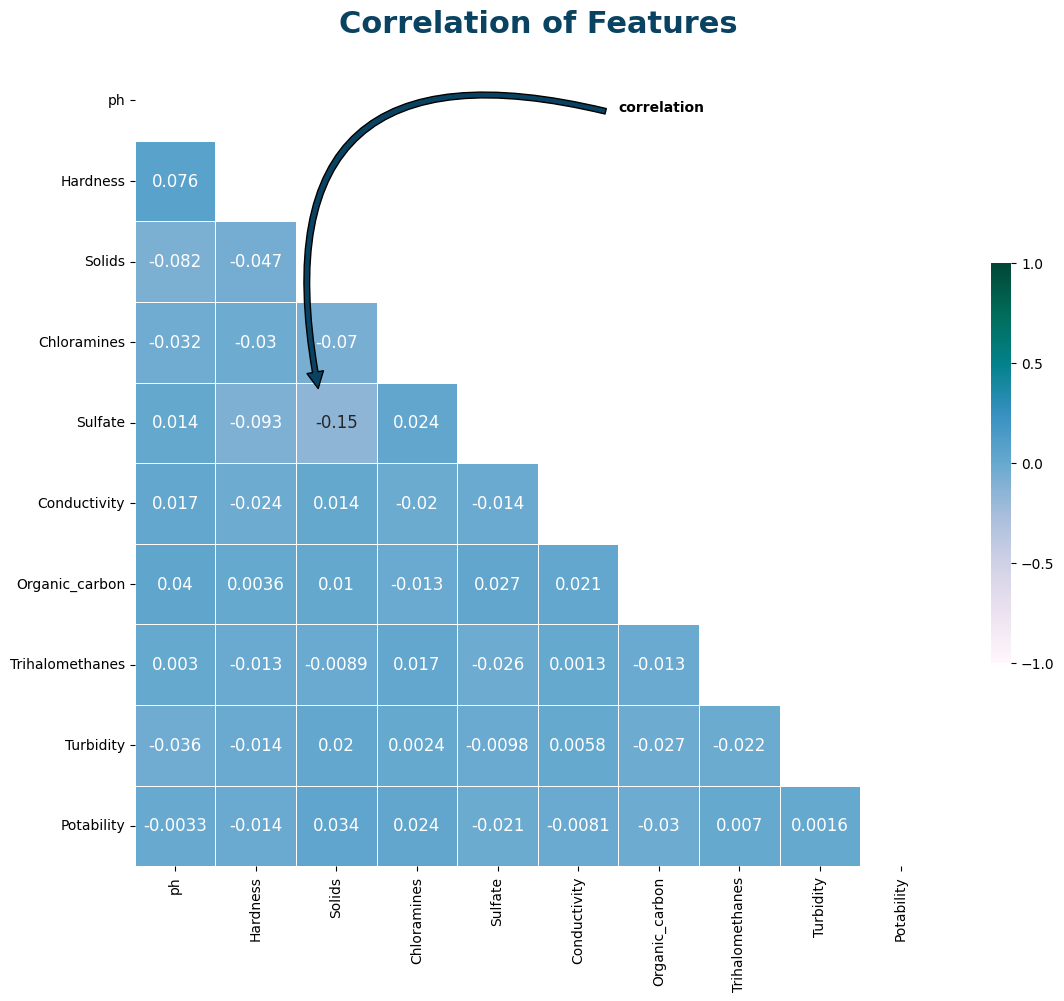

In [34]:
from matplotlib.patches import ConnectionStyle
mask=np.zeros_like(water_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fix, ax = plt.subplots(figsize=(13, 13))

heatmap = sbn.heatmap(water_df.corr(), mask=mask, square=True,
                      linewidths=0.5,
                      cmap='PuBuGn',
                      cbar_kws = {'shrink': .4, 'ticks': [-1, -0.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

# add the column names as labels
ax.set_xticklabels(water_df.corr())
ax.set_yticklabels(water_df.corr(), rotation=0)
sbn.set_style({'xtick.bottom': True, 'ytick.left': True})

ax.annotate('correlation',
            fontsize=10, fontweight='bold',
            xy=(2.3, 4.2), xycoords='data',
            xytext=(0.6, 0.95), textcoords='axes fraction',
            arrowprops = dict(
                facecolor=theme[3], shrink=0.025,
                connectionstyle='arc3, rad=0.80'
            ),
            horizontalalignment='left', verticalalignment='top'
          )
ax.set_title('Correlation of Features', size=22, color=theme[3], weight='bold', pad=20)

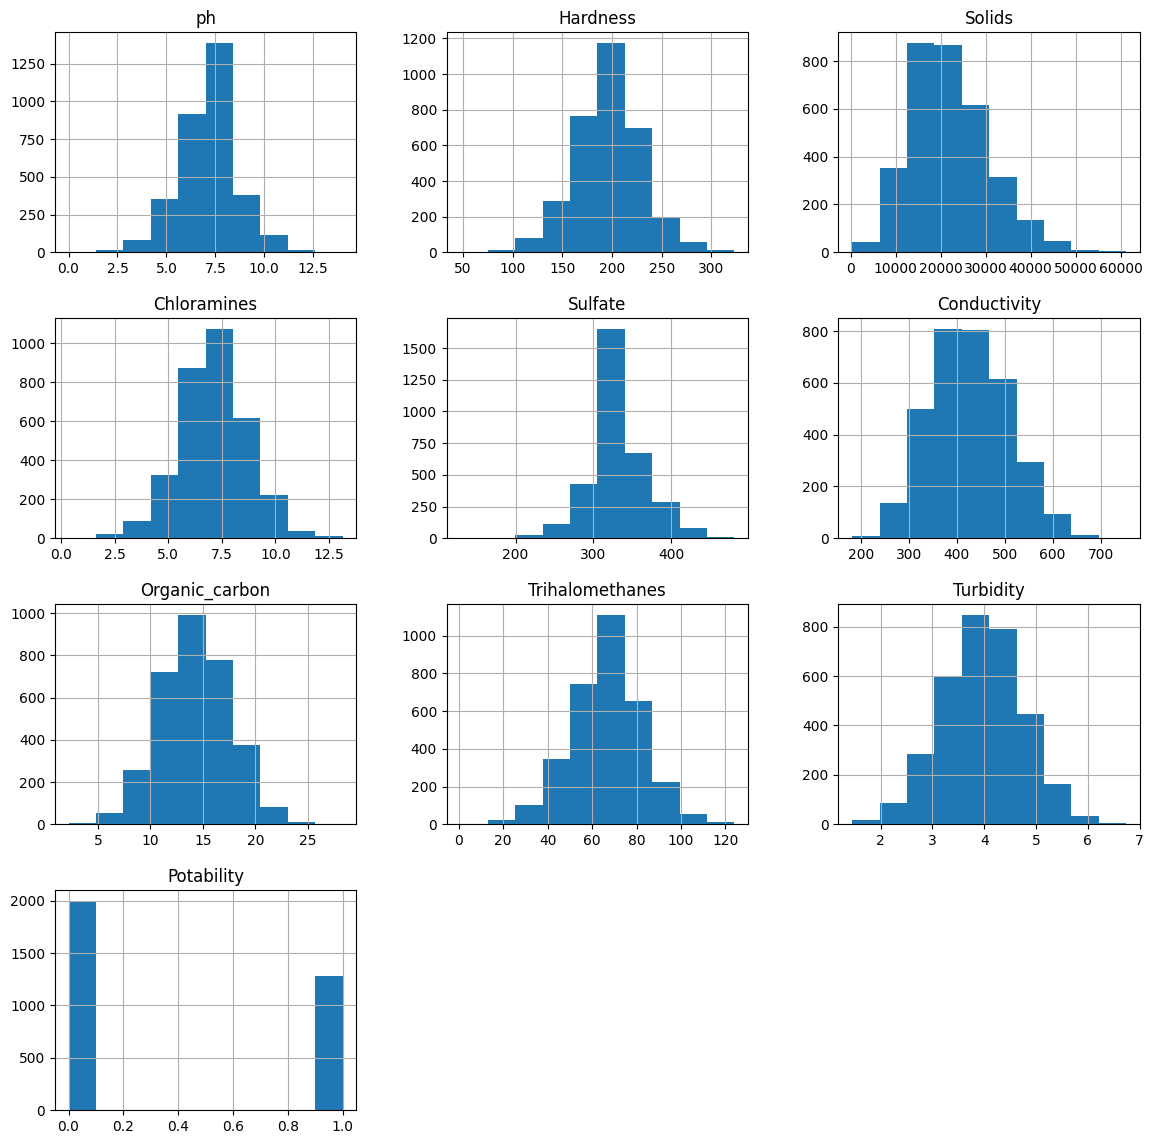

In [35]:
water_df.hist(figsize=(14, 14))
plt.show()

<Axes: >

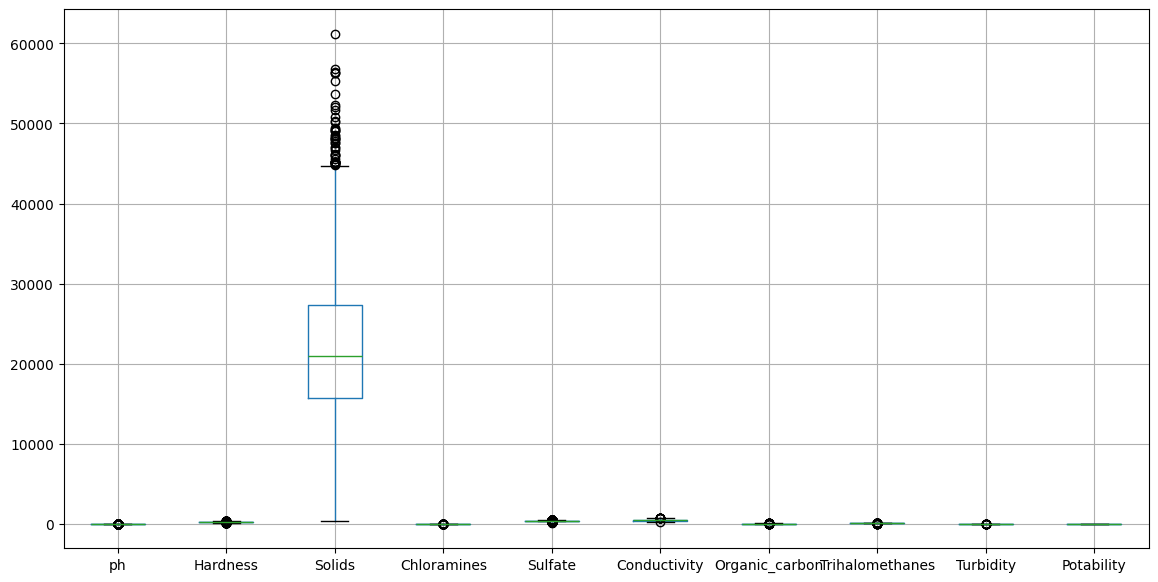

In [38]:
water_df.boxplot(figsize=(14, 7))